# COVID-19 Case Forecaster using ARIMA Models

Using standard ARIMA forecasting techniques, I looked to predict the future of corona-virus cases in India

### Standard Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

### pmdarima helps efficiently calculate the best p,d,q values for ARIMA models

In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Imported the dataset called confirmed.csv. I'm using data from March 12 onwards

In [4]:
# cvd19_confirmed = pd.read_csv('confirmed.csv', index_col='Date', parse_dates=True)[50:]
cvd19_confirmed = pd.read_csv('confirmed.csv', index_col='Date', parse_dates=True)[8:]

In [5]:
cvd19_confirmed.index.freq = 'D'

In [6]:
cvd19_confirmed.head()

,Unnamed: 0,India
Date,,
2020-01-30,8,1
2020-01-31,9,1
2020-02-01,10,1
2020-02-02,11,2
2020-02-03,12,3


In [7]:
cvd19_confirmed.tail()

,Unnamed: 0,India
Date,,
2020-07-22,182,1238798
2020-07-23,183,1288108
2020-07-24,184,1337024
2020-07-25,185,1385635
2020-07-26,186,1435616


In [8]:
cvd19_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2020-01-30 to 2020-07-26
Freq: D
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  179 non-null    int64
 1   India       179 non-null    int64
dtypes: int64(2)
memory usage: 4.2 KB


### Setting index, cleaning blank columns

In [9]:
cvd19_confirmed = cvd19_confirmed.drop('Unnamed: 0', axis=1)

In [10]:
len(cvd19_confirmed['India'])

179

In [11]:
cvd19_confirmed.head(20)

,India
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
2020-02-04,3
2020-02-05,3
2020-02-06,3
2020-02-07,3


### Importing plot_acf, plot_pacf for understanding nature of data. 
### Importing seasonal_decompose to find seasonality and trend of data

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decompose = seasonal_decompose(cvd19_confirmed['India'], model='multiplicative');

#### Data is non seasonal

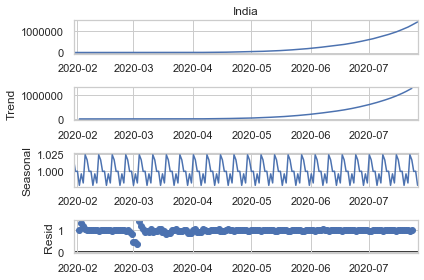

In [14]:
decompose.plot();

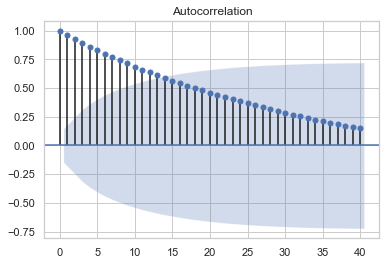

In [15]:
acf=plot_acf(cvd19_confirmed['India'], lags=40)

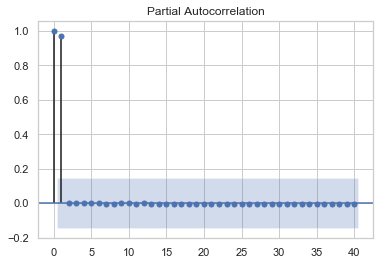

In [16]:
pacf=plot_pacf(cvd19_confirmed['India'], lags=40)

In [17]:
# Strong AR System. p = 1, q = 0

In [18]:
pmd = auto_arima(cvd19_confirmed['India'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA(2,2,2)x(0,0,0,0) [intercept=True]; AIC=2929.873, BIC=2948.929, Time=0.902 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2953.869, BIC=2960.221, Time=0.015 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=2948.609, BIC=2958.137, Time=0.016 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2939.717, BIC=2949.245, Time=0.163 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=2965.293, BIC=2968.469, Time=0.016 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=2937.313, BIC=2953.194, Time=0.100 seconds
Fit ARIMA(2,2,1)x(0,0,0,0) [intercept=True]; AIC=2945.955, BIC=2961.836, Time=0.069 seconds
Fit ARIMA(3,2,2)x(0,0,0,0) [intercept=True]; AIC=2883.001, BIC=2905.234, Time=0.581 seconds
Fit ARIMA(3,2,1)x(0,0,0,0) [intercept=True]; AIC=2930.968, BIC=2950.025, Time=0.124 seconds
Fit ARIMA(4,2,2)x(0,0,0,0) [intercept=True]; AIC=2904.072, BIC=2929.481, Time=0.847 seconds
Near non-invertible roots for order 

### Best fit model is (0, 2, 1)

In [19]:
pmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  179
Model:               SARIMAX(4, 2, 3)   Log Likelihood               -1429.052
Date:                Mon, 27 Jul 2020   AIC                           2876.103
Time:                        21:57:45   BIC                           2904.689
Sample:                             0   HQIC                          2887.696
                                - 179                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7633     20.497      0.330      0.741     -33.409      46.936
ar.L1          0.6823      0.066     10.276      0.000       0.552       0.812
ar.L2          0.3401      0.066      5.117      0.000       0.210       0.470
ar.L3         -0.4518      0.072     -6.243      0.000      -0.594      -0.310
ar.L4          0.4266      0.055      7.739      0.000       0.319       0.535
ma.L1         -0.7064      0.092     -7.685      0.000      -0.887      -0.526
ma.L2         -0.8897      0.108     -8.208      0.000      -1.102      -0.677
ma.L3          0.8167      0.071     11.491      0.000       0.677       0.956
sigma2      5.213e+05    1.9e-06   2.74e+11      0.000    5.21e+05    5.21e+05
===================================================================================
Ljung-Box (Q):                       87.26   Jarque-Bera (JB):               365.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             247.89   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.47e+30. Standard errors may be unstable.
"""

### Importing ARIMA library

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
para=pmd.get_params()['order']

In [25]:
model=ARIMA(cvd19_confirmed['India'], order=para)

In [26]:
fit_model=model.fit()

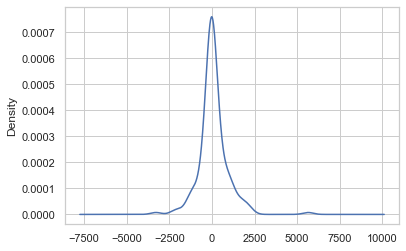

In [27]:
fit_model.resid.plot(kind='kde')

In [28]:
future_pred = pd.DataFrame()

In [29]:
future_pred['Predictions'] = fit_model.predict(start=2, end=len(cvd19_confirmed)+30, typ='levels')

In [30]:
future_pred.tail(12)

,Predictions
2020-08-15,2.619785e+06
2020-08-16,2.690374e+06
2020-08-17,2.761992e+06
2020-08-18,2.832843e+06
2020-08-19,2.905369e+06
2020-08-20,2.980419e+06
2020-08-21,3.055224e+06
2020-08-22,3.130004e+06
2020-08-23,3.207445e+06
2020-08-24,3.286286e+06


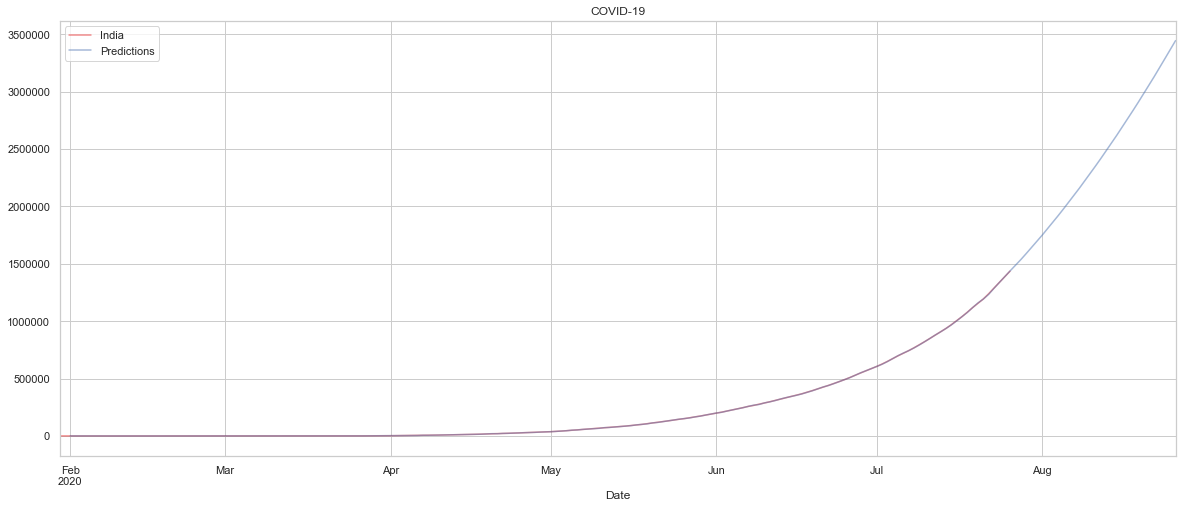

In [31]:
cvd19_confirmed.plot(figsize=(20, 8), legend=True, colormap='Set1', alpha=0.5, title='COVID-19')
future_pred['Predictions'].plot(legend=True, alpha=0.5)

In [32]:
future_pred['New cases'] = future_pred['Predictions'].diff(1)

In [33]:
future_pred.head()

,Predictions,New cases
2020-02-01,283.612732,NaN
2020-02-02,333.744409,50.131677
2020-02-03,655.062712,321.318303
2020-02-04,10.341610,-644.721101
2020-02-05,7.644752,-2.696858


In [34]:
future_pred.tail(15)

,Predictions,New cases
2020-08-12,2.416465e+06,65705.219218
2020-08-13,2.484461e+06,67995.818824
2020-08-14,2.551971e+06,67509.925755
2020-08-15,2.619785e+06,67814.292449
2020-08-16,2.690374e+06,70589.167547
2020-08-17,2.761992e+06,71617.698722
2020-08-18,2.832843e+06,70851.255019
2020-08-19,2.905369e+06,72525.470350
2020-08-20,2.980419e+06,75050.104491
2020-08-21,3.055224e+06,74804.861655


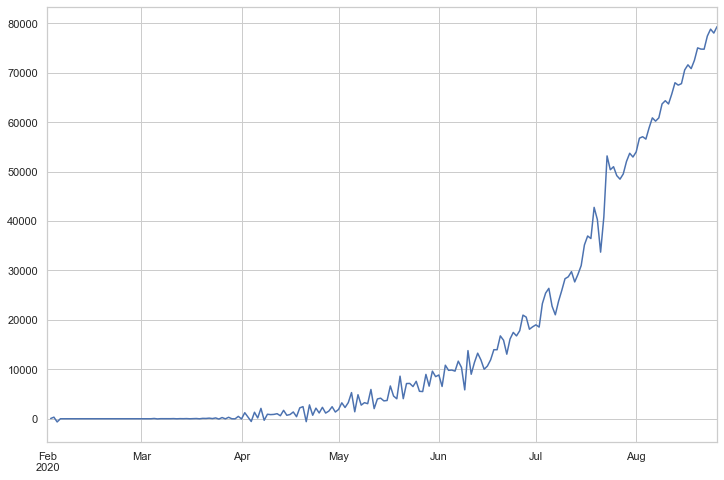

In [35]:
future_pred['New cases'].plot(figsize=(12, 8))